# Analisis de datos de Colan Viyachal
La aplicacion en codigo de regresion lineal esta basado en el codigo de: [Regresion multiple lineal en bicicletas](https://www.kaggle.com/code/gauravduttakiit/bike-sharing-multiple-linear-regression/notebook#Final-Model-Interpretation)

## Librerias

In [3]:
!pip list

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkcharts                      0.2
blac

In [4]:
!pip install pandas
!pip install seaborn


## Previsualizacion de los datos

In [5]:
import pandas as pd
import seaborn as sns
dataframe=pd.read_csv('Encuesta Colan Viyachal.csv',sep=';')

In [6]:
dataframe.head(5)

,id,medio,ola,anexo,poblado,bienestar,corona,edad,sexo,origen,...,condicion.tierra,condicion.rios,condicion.aire,condicion.mar,prod.respeta.ambiente,prod.adecuada.salud,tiempo.descanso,espacios.recreativos,disfrutan.naturaleza,preocupacion.mediambiente
0,303,Presencial,Ola 1,NaN,Miramar,Regular,Mucho,37,Mujer,Mestizo/a,...,Mala,Mala,Mala,Mala,En desacuerdo,En desacuerdo,De acuerdo,De acuerdo,En desacuerdo,En desacuerdo
1,304,Presencial,Ola 1,NaN,NaN,Buena,Mucho,49,Hombre,Mestizo/a,...,Mala,Muy mala,Regular,NS/NR,Ni de acuerdo ni en desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo
2,305,Presencial,Ola 1,NaN,Miramar,Mala,Demasiado,42,Mujer,Mestizo/a,...,Mala,Regular,Mala,Regular,En desacuerdo,De acuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo
3,306,Presencial,Base,Pueblo Nuevo de Colan,Pueblo Nuevo de Colan,Buena,Mucho,42,Hombre,Mestizo/a,...,Muy buena,Buena,Buena,Muy buena,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo
4,307,telefonico,Base,Pueblo Nuevo de Colan,Pueblo Nuevo de Colan,Regular,Mucho,19,Mujer,Mestizo/a,...,Buena,Regular,Buena,Regular,Ni de acuerdo ni en desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,De acuerdo,En desacuerdo


In [7]:
dataframe.columns

Index(['id', 'medio', 'ola', 'anexo', 'poblado', 'bienestar', 'corona', 'edad',
       'sexo', 'origen',
       ...
       'condicion.tierra', 'condicion.rios', 'condicion.aire', 'condicion.mar',
       'prod.respeta.ambiente', 'prod.adecuada.salud', 'tiempo.descanso',
       'espacios.recreativos', 'disfrutan.naturaleza',
       'preocupacion.mediambiente'],
      dtype='object', length=117)

<AxesSubplot:xlabel='bienestar', ylabel='edad'>

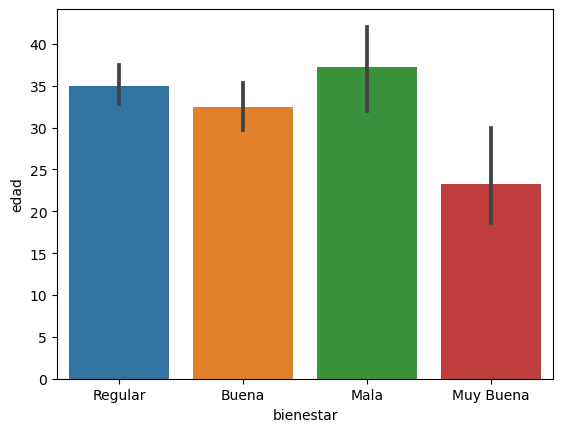

In [8]:
sns.barplot(data=dataframe,y='edad',x='bienestar')

<AxesSubplot:xlabel='edad', ylabel='educ'>

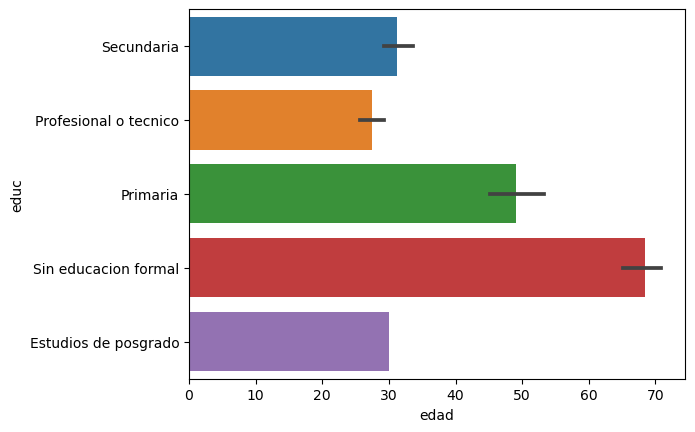

In [9]:
sns.barplot(data=dataframe,y='educ',x='edad')

## Limpieza de datos

### Datos Duplicados

In [10]:
dataframe_dup=dataframe.copy()
dataframe_dup.drop_duplicates(subset=None,inplace=True)

In [11]:
dataframe_dup.shape

(300, 117)

In [12]:
dataframe.shape

(300, 117)

### Adaptar datos

In [13]:
analysis=['bienestar','educ','tiempo.escuela','tiempo.salud','tiempo.trabajo','agua.potable',
            'electricidad','internet.fijo','empleo','empl.principal','trabajo.infantil','empleo.calidad','comido.menos',
            'acceso.educacion','acceso.salud','acceso.transporte','acceso.internet','sistema.salud','mismas.oportunidades','servicios.salud',
            'transporte','trato.trabajo','trato.fam','espacios.abiertos','estado.dialogante','empresa.dialogante','condicion.bosques','condicion.tierra',
            'condicion.rios','condicion.aire','tiempo.descanso','espacios.recreativos']
dataframe_dirty=dataframe_dup[analysis]
dataframe_dirty.head(5)

,bienestar,educ,tiempo.escuela,tiempo.salud,tiempo.trabajo,agua.potable,electricidad,internet.fijo,empleo,empl.principal,...,trato.fam,espacios.abiertos,estado.dialogante,empresa.dialogante,condicion.bosques,condicion.tierra,condicion.rios,condicion.aire,tiempo.descanso,espacios.recreativos
0,Regular,Secundaria,NaN,00:20:00.000-05:00,NaN,Si,Si,No,No,NaN,...,Bueno,En desacuerdo,Muy en desacuerdo,En desacuerdo,Mala,Mala,Mala,Mala,De acuerdo,De acuerdo
1,Buena,Secundaria,NaN,00:25:00.000-05:00,00:10:00.000-05:00,Si,Si,No,Si,Trabajador/a por cuenta propia en actividades ...,...,Bueno,Ni de acuerdo ni en desacuerdo,En desacuerdo,NS/NR,Regular,Mala,Muy mala,Regular,De acuerdo,Ni de acuerdo ni en desacuerdo
2,Mala,Profesional o tecnico,01:00:00.000-05:00,00:02:00.000-05:00,00:05:00.000-05:00,Si,Si,Si,Si,Trabajador/a por cuenta propia en actividades ...,...,Bueno,De acuerdo,Muy en desacuerdo,Muy en desacuerdo,Mala,Mala,Regular,Mala,De acuerdo,De acuerdo
3,Buena,Secundaria,00:10:00.000-05:00,00:20:00.000-05:00,00:45:00.000-05:00,Si,Si,Si,Si,Jornalero/a o peon,...,Muy bueno,De acuerdo,De acuerdo,De acuerdo,Muy buena,Muy buena,Buena,Buena,De acuerdo,De acuerdo
4,Regular,Profesional o tecnico,00:10:00.000-05:00,00:15:00.000-05:00,00:15:00.000-05:00,Si,Si,No,Si,Empleado/a en empresa o negocio en actividades...,...,Bueno,De acuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Regular,Buena,Regular,Buena,De acuerdo,Ni de acuerdo ni en desacuerdo


In [14]:
dataframe_dirty.isnull().sum()

bienestar                 0
educ                      0
tiempo.escuela          152
tiempo.salud              2
tiempo.trabajo          119
agua.potable              0
electricidad              0
internet.fijo             0
empleo                    0
empl.principal           94
trabajo.infantil          1
empleo.calidad            3
comido.menos              0
acceso.educacion          1
acceso.salud              2
acceso.transporte         2
acceso.internet           2
sistema.salud             1
mismas.oportunidades      1
servicios.salud           0
transporte                0
trato.trabajo             1
trato.fam                 0
espacios.abiertos         1
estado.dialogante         1
empresa.dialogante        1
condicion.bosques         0
condicion.tierra          0
condicion.rios            0
condicion.aire            0
tiempo.descanso           1
espacios.recreativos      0
dtype: int64

In [15]:
dataframe_dirty=dataframe_dirty.drop(columns=['tiempo.escuela','tiempo.trabajo','empl.principal'])

In [16]:
dataframe_dirty=dataframe_dirty.fillna(method='bfill',axis=0).fillna(0)

In [17]:
dataframe_dirty['tiempo.salud'].value_counts()

00:10:00.000-05:00    91
00:05:00.000-05:00    81
00:15:00.000-05:00    39
00:20:00.000-05:00    38
00:30:00.000-05:00    17
00:02:00.000-05:00    10
00:25:00.000-05:00     7
00:03:00.000-05:00     5
00:12:00.000-05:00     3
00:07:00.000-05:00     3
00:01:00.000-05:00     2
00:00:00.000-05:00     1
01:00:00.000-05:00     1
02:00:00.000-05:00     1
00:08:00.000-05:00     1
Name: tiempo.salud, dtype: int64

In [18]:
dataframe_dirty['tiempo.salud'] = dataframe_dirty['tiempo.salud'].replace('nan','00:00:00.000-05:00')

In [19]:
from datetime import datetime
def obtener_hora(tiempo):
  tiempo_obj = datetime.strptime(tiempo, '%H:%M:%S.%f%z')
  return tiempo_obj.minute + tiempo_obj.hour*60
  
dataframe_dirty['tiempo.salud'] = dataframe_dirty['tiempo.salud'].apply(obtener_hora)

In [20]:
dataframe_dirty['tiempo.salud']

0      20
1      25
2       2
3      20
4      15
       ..
295    15
296    10
297    10
298    10
299    15
Name: tiempo.salud, Length: 300, dtype: int64

### Adaptar fila a predecir

In [21]:
dataframe_dirty['condicion.bosques'].value_counts()

Buena        169
Regular       97
Mala          20
Muy buena     11
Muy mala       2
NS/NR          1
Name: condicion.bosques, dtype: int64

In [22]:
mapeo_bien = {'NS/NR':0,'Muy mala':1,'Muy malo':1,'Malo':2, 'Mala': 2,'Regular': 3, 'Buena': 4,'Bueno':4, 'Muy buena': 5,'Muy bueno':5,'Muy Buena':5}
lista=['bienestar','trato.fam','condicion.tierra','condicion.rios','condicion.aire','condicion.bosques','servicios.salud','transporte','trato.trabajo']
dataframe_dirty[lista] = dataframe_dirty[lista].replace(mapeo_bien)


#dataframe_dirty.loc[:, 'bienestar'] = dataframe_dirty['bienestar'].map(mapeo_bien)

In [23]:
dataframe_dirty

,bienestar,educ,tiempo.salud,agua.potable,electricidad,internet.fijo,empleo,trabajo.infantil,empleo.calidad,comido.menos,...,trato.fam,espacios.abiertos,estado.dialogante,empresa.dialogante,condicion.bosques,condicion.tierra,condicion.rios,condicion.aire,tiempo.descanso,espacios.recreativos
0,3,Secundaria,20,Si,Si,No,No,En desacuerdo,Muy en desacuerdo,No,...,4,En desacuerdo,Muy en desacuerdo,En desacuerdo,2,2,2,2,De acuerdo,De acuerdo
1,4,Secundaria,25,Si,Si,No,Si,NS/NR,En desacuerdo,Si,...,4,Ni de acuerdo ni en desacuerdo,En desacuerdo,NS/NR,3,2,1,3,De acuerdo,Ni de acuerdo ni en desacuerdo
2,2,Profesional o tecnico,2,Si,Si,Si,Si,Muy en desacuerdo,En desacuerdo,No,...,4,De acuerdo,Muy en desacuerdo,Muy en desacuerdo,2,2,3,2,De acuerdo,De acuerdo
3,4,Secundaria,20,Si,Si,Si,Si,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Si,...,5,De acuerdo,De acuerdo,De acuerdo,5,5,4,4,De acuerdo,De acuerdo
4,3,Profesional o tecnico,15,Si,Si,No,Si,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,No,...,4,De acuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,3,4,3,4,De acuerdo,Ni de acuerdo ni en desacuerdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,4,Sin educacion formal,15,Si,No,No,Si,En desacuerdo,En desacuerdo,No,...,5,Ni de acuerdo ni en desacuerdo,Muy en desacuerdo,Muy en desacuerdo,4,4,3,4,Ni de acuerdo ni en desacuerdo,De acuerdo
296,3,Secundaria,10,Si,Si,Si,No,Ni de acuerdo ni en desacuerdo,De acuerdo,No,...,5,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,3,2,2,3,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo
297,3,Secundaria,10,Si,Si,No,No,NS/NR,Ni de acuerdo ni en desacuerdo,Si,...,4,NS/NR,En desacuerdo,En desacuerdo,2,2,2,2,De acuerdo,De acuerdo
298,3,Profesional o tecnico,10,Si,Si,No,Si,En desacuerdo,Ni de acuerdo ni en desacuerdo,No,...,4,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,3,3,3,3,De acuerdo,De acuerdo


In [24]:
mapeo_acuerdo = {'NS/NR':0,'Muy en desacuerdo':1, 'En desacuerdo': 2,'Ni de acuerdo ni en desacuerdo': 3, 'De acuerdo': 4, 'Muy de acuerdo': 5}
lista=['trabajo.infantil','empleo.calidad','espacios.abiertos','estado.dialogante','empresa.dialogante','tiempo.descanso','espacios.recreativos','acceso.educacion','acceso.salud','acceso.transporte','acceso.internet','sistema.salud','mismas.oportunidades']
dataframe_dirty[lista] = dataframe_dirty[lista].replace(mapeo_acuerdo)

In [25]:
dataframe_dirty

,bienestar,educ,tiempo.salud,agua.potable,electricidad,internet.fijo,empleo,trabajo.infantil,empleo.calidad,comido.menos,...,trato.fam,espacios.abiertos,estado.dialogante,empresa.dialogante,condicion.bosques,condicion.tierra,condicion.rios,condicion.aire,tiempo.descanso,espacios.recreativos
0,3,Secundaria,20,Si,Si,No,No,2,1,No,...,4,2,1,2,2,2,2,2,4,4
1,4,Secundaria,25,Si,Si,No,Si,0,2,Si,...,4,3,2,0,3,2,1,3,4,3
2,2,Profesional o tecnico,2,Si,Si,Si,Si,1,2,No,...,4,4,1,1,2,2,3,2,4,4
3,4,Secundaria,20,Si,Si,Si,Si,3,3,Si,...,5,4,4,4,5,5,4,4,4,4
4,3,Profesional o tecnico,15,Si,Si,No,Si,3,3,No,...,4,4,3,3,3,4,3,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,4,Sin educacion formal,15,Si,No,No,Si,2,2,No,...,5,3,1,1,4,4,3,4,3,4
296,3,Secundaria,10,Si,Si,Si,No,3,4,No,...,5,3,3,2,3,2,2,3,3,3
297,3,Secundaria,10,Si,Si,No,No,0,3,Si,...,4,0,2,2,2,2,2,2,4,4
298,3,Profesional o tecnico,10,Si,Si,No,Si,2,3,No,...,4,4,3,2,3,3,3,3,4,4


### Creacion de variables dummy

In [26]:
lista = pd.concat([dataframe_dirty.iloc[:, 1], dataframe_dirty.iloc[:, 3:7], dataframe_dirty.iloc[:, 9]], axis=1)
lista=lista.columns
lista

Index(['educ', 'agua.potable', 'electricidad', 'internet.fijo', 'empleo',
       'comido.menos'],
      dtype='object')

In [27]:
for column in dataframe_dirty.columns:
    if column in lista:
        temp=pd.get_dummies(dataframe_dirty[column],drop_first=True,prefix=column)
        dataframe_dirty=pd.concat([dataframe_dirty,temp],axis=1)
        dataframe_dirty=dataframe_dirty.drop([column],axis=1)
    pass

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
dataframe_dirty

,bienestar,tiempo.salud,trabajo.infantil,empleo.calidad,acceso.educacion,acceso.salud,acceso.transporte,acceso.internet,sistema.salud,mismas.oportunidades,servicios.salud,transporte,trato.trabajo,trato.fam,espacios.abiertos,estado.dialogante,empresa.dialogante,condicion.bosques,condicion.tierra,condicion.rios,condicion.aire,tiempo.descanso,espacios.recreativos,educ_Primaria,educ_Profesional o tecnico,educ_Secundaria,educ_Sin educacion formal,agua.potable_Si,electricidad_Si,internet.fijo_Si,empleo_Si,comido.menos_Si
0,3,20,2,1,1,1,4,4,1,3,1,3,0,4,2,1,2,2,2,2,2,4,4,0,0,1,0,1,1,0,0,0
1,4,25,0,2,3,2,3,2,2,2,2,3,4,4,3,2,0,3,2,1,3,4,3,0,0,1,0,1,1,0,1,1
2,2,2,1,2,1,1,4,3,1,4,1,3,4,4,4,1,1,2,2,3,2,4,4,0,1,0,0,1,1,1,1,0
3,4,20,3,3,4,4,4,4,4,4,3,4,4,5,4,4,4,5,5,4,4,4,4,0,0,1,0,1,1,1,1,1
4,3,15,3,3,3,3,4,4,2,4,3,4,5,4,4,3,3,3,4,3,4,4,3,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,4,15,2,2,3,2,3,3,2,4,3,3,5,5,3,1,1,4,4,3,4,3,4,0,0,0,1,1,0,0,1,0
296,3,10,3,4,4,2,3,2,3,4,2,3,3,5,3,3,2,3,2,2,3,3,3,0,0,1,0,1,1,1,0,0
297,3,10,0,3,3,2,3,3,2,3,2,2,3,4,0,2,2,2,2,2,2,4,4,0,0,1,0,1,1,0,0,1
298,3,10,2,3,3,2,2,3,3,4,2,3,3,4,4,3,2,3,3,3,3,4,4,0,1,0,0,1,1,0,1,0


### Rescalamiento de caracteristicas

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
lista = dataframe_dirty.loc[:, 'bienestar':'espacios.recreativos']
lista=lista.columns
lista

Index(['bienestar', 'tiempo.salud', 'trabajo.infantil', 'empleo.calidad',
       'acceso.educacion', 'acceso.salud', 'acceso.transporte',
       'acceso.internet', 'sistema.salud', 'mismas.oportunidades',
       'servicios.salud', 'transporte', 'trato.trabajo', 'trato.fam',
       'espacios.abiertos', 'estado.dialogante', 'empresa.dialogante',
       'condicion.bosques', 'condicion.tierra', 'condicion.rios',
       'condicion.aire', 'tiempo.descanso', 'espacios.recreativos'],
      dtype='object')

In [32]:
dataframe_scaler=dataframe_dirty

In [34]:
lista = pd.concat([dataframe_dirty.loc[:, 'tiempo.salud':'mismas.oportunidades'],
                    dataframe_dirty.loc[:,'espacios.abiertos':'empresa.dialogante'],
                    dataframe_dirty.loc[:,'tiempo.descanso':'espacios.recreativos']],axis=1)
lista=lista.columns

dataframe_scaler[lista]=scaler.fit_transform(dataframe_scaler[lista].values)
dataframe_scaler.head()

,bienestar,tiempo.salud,trabajo.infantil,empleo.calidad,acceso.educacion,acceso.salud,acceso.transporte,acceso.internet,sistema.salud,mismas.oportunidades,servicios.salud,transporte,trato.trabajo,trato.fam,espacios.abiertos,estado.dialogante,empresa.dialogante,condicion.bosques,condicion.tierra,condicion.rios,condicion.aire,tiempo.descanso,espacios.recreativos,educ_Primaria,educ_Profesional o tecnico,educ_Secundaria,educ_Sin educacion formal,agua.potable_Si,electricidad_Si,internet.fijo_Si,empleo_Si,comido.menos_Si
0,0.333333,0.166667,0.50,0.00,0.00,0.00,0.666667,0.8,0.000000,0.50,0.000000,0.50,0.0,0.5,0.4,0.000000,0.50,0.4,0.25,0.25,0.25,0.75,1.000000,0,0,1,0,1,1,0,0,0
1,0.666667,0.208333,0.00,0.25,0.50,0.25,0.333333,0.4,0.333333,0.25,0.333333,0.50,0.8,0.5,0.6,0.333333,0.00,0.6,0.25,0.00,0.50,0.75,0.666667,0,0,1,0,1,1,0,1,1
2,0.000000,0.016667,0.25,0.25,0.00,0.00,0.666667,0.6,0.000000,0.75,0.000000,0.50,0.8,0.5,0.8,0.000000,0.25,0.4,0.25,0.50,0.25,0.75,1.000000,0,1,0,0,1,1,1,1,0
3,0.666667,0.166667,0.75,0.50,0.75,0.75,0.666667,0.8,1.000000,0.75,0.666667,0.75,0.8,1.0,0.8,1.000000,1.00,1.0,1.00,0.75,0.75,0.75,1.000000,0,0,1,0,1,1,1,1,1
4,0.333333,0.125000,0.75,0.50,0.50,0.50,0.666667,0.8,0.333333,0.75,0.666667,0.75,1.0,0.5,0.8,0.666667,0.75,0.6,0.75,0.50,0.75,0.75,0.666667,0,1,0,0,1,1,0,1,0


## Empezamos la construccion del modelo

In [35]:
#y obtiene los datos de la fila eliminado de dataframe
Y=dataframe_dirty.pop('bienestar')
X=dataframe_dirty

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=100)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# # analisis de variables para ver si son multicolinealiades
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# Codigo referencial: https://www.kaggle.com/code/gauravduttakiit/bike-sharing-multiple-linear-regression/notebook#BUILDING-A-LINEAR-MODEL

,Features,VIF
23,educ_Profesional o tecnico,106.64
24,educ_Secundaria,89.40
22,educ_Primaria,39.83
25,educ_Sin educacion formal,7.66
14,estado.dialogante,4.50
2,empleo.calidad,2.96
15,empresa.dialogante,2.93
19,condicion.aire,2.59
11,trato.trabajo,2.57
7,sistema.salud,2.43


In [38]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [39]:
lr1.params

const                         0.034534
tiempo.salud                  0.077903
trabajo.infantil             -0.051051
empleo.calidad                0.089352
acceso.educacion              0.176864
acceso.salud                  0.010986
acceso.transporte             0.106863
acceso.internet               0.089807
sistema.salud                -0.006229
mismas.oportunidades          0.008865
servicios.salud               0.090843
transporte                   -0.054965
trato.trabajo                 0.080344
trato.fam                     0.019162
espacios.abiertos             0.025416
estado.dialogante             0.032118
empresa.dialogante           -0.089221
condicion.bosques             0.254468
condicion.tierra             -0.044143
condicion.rios                0.115244
condicion.aire               -0.096440
tiempo.descanso              -0.177529
espacios.recreativos          0.052804
educ_Primaria                -0.073323
educ_Profesional o tecnico   -0.035820
educ_Secundaria          

In [40]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:              bienestar   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.217
Date:                Mon, 16 Jan 2023   Prob (F-statistic):              0.216
Time:                        15:25:06   Log-Likelihood:                 36.510
No. Observations:                 210   AIC:                            -11.02
Df Residuals:                     179   BIC:                             92.74
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Modelo 2

In [41]:
# De ahi es usual ir quitando variables que tal vez no sea tan relevantes para el modelo basadonos en el VIF(variance_inflation_factor) mas cercano al 0
# se puede seguir varias veces en el analisis del codigo lo hiciero  6 veces
X_train_new = X_train.drop(["educ_Profesional o tecnico"], axis = 1)

In [42]:

# # analisis de variables para ver si son multicolinealiades
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# Codigo referencial: https://www.kaggle.com/code/gauravduttakiit/bike-sharing-multiple-linear-regression/notebook#BUILDING-A-LINEAR-MODEL

,Features,VIF
16,condicion.bosques,51.41
26,electricidad_Si,50.02
20,tiempo.descanso,42.13
6,acceso.internet,40.58
13,espacios.abiertos,38.64
25,agua.potable_Si,33.87
10,transporte,26.62
19,condicion.aire,25.04
17,condicion.tierra,22.41
15,empresa.dialogante,17.82


In [43]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()


In [44]:
lr2.params

const                         0.034534
tiempo.salud                  0.077903
trabajo.infantil             -0.051051
empleo.calidad                0.089352
acceso.educacion              0.176864
acceso.salud                  0.010986
acceso.transporte             0.106863
acceso.internet               0.089807
sistema.salud                -0.006229
mismas.oportunidades          0.008865
servicios.salud               0.090843
transporte                   -0.054965
trato.trabajo                 0.080344
trato.fam                     0.019162
espacios.abiertos             0.025416
estado.dialogante             0.032118
empresa.dialogante           -0.089221
condicion.bosques             0.254468
condicion.tierra             -0.044143
condicion.rios                0.115244
condicion.aire               -0.096440
tiempo.descanso              -0.177529
espacios.recreativos          0.052804
educ_Primaria                -0.073323
educ_Profesional o tecnico   -0.035820
educ_Secundaria          

In [45]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:              bienestar   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.217
Date:                Mon, 16 Jan 2023   Prob (F-statistic):              0.216
Time:                        15:25:06   Log-Likelihood:                 36.510
No. Observations:                 210   AIC:                            -11.02
Df Residuals:                     179   BIC:                             92.74
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [46]:
X_train_new = X_train_new.drop(["condicion.bosques"], axis = 1)

In [47]:

# # analisis de variables para ver si son multicolinealiades
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# Codigo referencial: https://www.kaggle.com/code/gauravduttakiit/bike-sharing-multiple-linear-regression/notebook#BUILDING-A-LINEAR-MODEL

,Features,VIF
25,electricidad_Si,49.68
19,tiempo.descanso,42.09
6,acceso.internet,40.16
13,espacios.abiertos,36.26
24,agua.potable_Si,32.48
10,transporte,26.33
16,condicion.tierra,21.60
18,condicion.aire,20.93
15,empresa.dialogante,17.56
5,acceso.transporte,17.41


In [48]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [49]:
lr3.params

const                        0.100617
tiempo.salud                 0.080990
trabajo.infantil            -0.029497
empleo.calidad               0.091400
acceso.educacion             0.195151
acceso.salud                -0.007032
acceso.transporte            0.110805
acceso.internet              0.098432
sistema.salud               -0.012745
mismas.oportunidades         0.019578
servicios.salud              0.092290
transporte                  -0.036256
trato.trabajo                0.090387
trato.fam                    0.046337
espacios.abiertos            0.069612
estado.dialogante            0.029410
empresa.dialogante          -0.124482
condicion.tierra            -0.007159
condicion.rios               0.123166
condicion.aire              -0.010397
tiempo.descanso             -0.188388
espacios.recreativos         0.040654
educ_Primaria               -0.038650
educ_Secundaria              0.035402
educ_Sin educacion formal    0.153968
agua.potable_Si              0.010835
electricidad

In [50]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:              bienestar   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.158
Date:                Mon, 16 Jan 2023   Prob (F-statistic):              0.276
Time:                        15:25:06   Log-Likelihood:                 34.979
No. Observations:                 210   AIC:                            -9.958
Df Residuals:                     180   BIC:                             90.45
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [51]:
X_train_new = X_train_new.drop(["educ_Profesional o tecnico"], axis = 1) 

KeyError: "['educ_Profesional o tecnico'] not found in axis"

In [56]:
# # analisis de variables para ver si son multicolinealiades
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,electricidad_Si,49.37
18,tiempo.descanso,41.56
6,acceso.internet,40.15
13,espacios.abiertos,36.24
23,agua.potable_Si,32.40
10,transporte,26.32
15,empresa.dialogante,17.50
5,acceso.transporte,17.34
17,condicion.aire,16.62
19,espacios.recreativos,15.16


In [57]:

# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [58]:
lr4.params

const                        0.099696
tiempo.salud                 0.081377
trabajo.infantil            -0.029495
empleo.calidad               0.090446
acceso.educacion             0.194863
acceso.salud                -0.008333
acceso.transporte            0.110463
acceso.internet              0.098464
sistema.salud               -0.012162
mismas.oportunidades         0.020265
servicios.salud              0.092272
transporte                  -0.036368
trato.trabajo                0.090556
trato.fam                    0.046651
espacios.abiertos            0.069914
estado.dialogante            0.029199
empresa.dialogante          -0.123960
condicion.rios               0.120438
condicion.aire              -0.013180
tiempo.descanso             -0.187260
espacios.recreativos         0.040072
educ_Primaria               -0.038527
educ_Secundaria              0.035580
educ_Sin educacion formal    0.153684
agua.potable_Si              0.010715
electricidad_Si             -0.014508
internet.fij

In [59]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:              bienestar   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.206
Date:                Mon, 16 Jan 2023   Prob (F-statistic):              0.231
Time:                        15:27:51   Log-Likelihood:                 34.977
No. Observations:                 210   AIC:                            -11.95
Df Residuals:                     181   BIC:                             85.11
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [60]:
X_train_new = X_train_new.drop(["tiempo.descanso"], axis = 1)

In [61]:
# # analisis de variables para ver si son multicolinealiades
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,electricidad_Si,46.78
6,acceso.internet,40.06
13,espacios.abiertos,35.14
22,agua.potable_Si,32.37
10,transporte,25.89
15,empresa.dialogante,17.48
5,acceso.transporte,17.29
17,condicion.aire,16.13
11,trato.trabajo,14.80
3,acceso.educacion,14.47


In [62]:
X_train_lm5 = sm.add_constant(X_train_new)


# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [63]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:              bienestar   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.194
Date:                Mon, 16 Jan 2023   Prob (F-statistic):              0.244
Time:                        15:27:59   Log-Likelihood:                 34.148
No. Observations:                 210   AIC:                            -12.30
Df Residuals:                     182   BIC:                             81.42
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [64]:
X_train_new = X_train_new.drop(["transporte"], axis = 1) 

In [65]:
# # analisis de variables para ver si son multicolinealiades
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,electricidad_Si,43.06
6,acceso.internet,40.05
12,espacios.abiertos,34.56
21,agua.potable_Si,32.37
14,empresa.dialogante,17.18
16,condicion.aire,16.12
5,acceso.transporte,15.87
10,trato.trabajo,14.54
3,acceso.educacion,14.46
11,trato.fam,13.32


In [66]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6= sm.OLS(y_train, X_train_lm6).fit()

In [67]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:              bienestar   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.238
Date:                Mon, 16 Jan 2023   Prob (F-statistic):              0.208
Time:                        15:28:12   Log-Likelihood:                 34.038
No. Observations:                 210   AIC:                            -14.08
Df Residuals:                     183   BIC:                             76.30
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [68]:
X_train_new = X_train_new.drop(["condicion.tierra"], axis = 1) 

KeyError: "['condicion.tierra'] not found in axis"

In [69]:
# # analisis de variables para ver si son multicolinealiades
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,electricidad_Si,43.06
6,acceso.internet,40.05
12,espacios.abiertos,34.56
21,agua.potable_Si,32.37
14,empresa.dialogante,17.18
16,condicion.aire,16.12
5,acceso.transporte,15.87
10,trato.trabajo,14.54
3,acceso.educacion,14.46
11,trato.fam,13.32


In [71]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7= sm.OLS(y_train, X_train_lm7).fit()

In [72]:
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:              bienestar   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.238
Date:                Mon, 16 Jan 2023   Prob (F-statistic):              0.208
Time:                        15:28:44   Log-Likelihood:                 34.038
No. Observations:                 210   AIC:                            -14.08
Df Residuals:                     183   BIC:                             76.30
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [74]:
y_train_pred = lr7.predict(X_train_lm7)

c:\Users\enrique\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

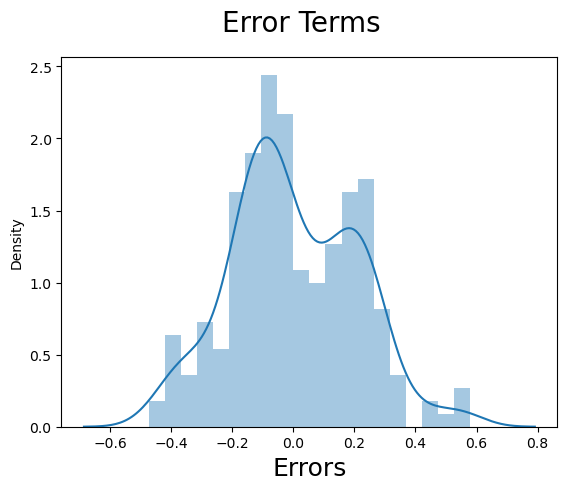

In [75]:
import matplotlib.pyplot as plt
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

El anterior grafico debe parecer a una distribucion normal. En palabras mas simple debe asemejarse a la figura de una campana que hace la linea azul

```Python
    bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

    sns.pairplot(bike_num, diag_kind='kde')
    plt.show()
```
Luego se realiza una grafica con las variables para ver el comportamiento de los datos y en varios se debe visualizar un grafico similar a una regresion lineal

In [82]:
#Selecting the variables that were part of final model.
columns=X_train_new.columns
X_test=X_test[columns]
# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)
X_test_lm7.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 222 to 3
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   const                      90 non-null     float64
 1   tiempo.salud               90 non-null     float64
 2   trabajo.infantil           90 non-null     float64
 3   empleo.calidad             90 non-null     float64
 4   acceso.educacion           90 non-null     float64
 5   acceso.salud               90 non-null     float64
 6   acceso.transporte          90 non-null     float64
 7   acceso.internet            90 non-null     float64
 8   sistema.salud              90 non-null     float64
 9   mismas.oportunidades       90 non-null     float64
 10  servicios.salud            90 non-null     float64
 11  trato.trabajo              90 non-null     float64
 12  trato.fam                  90 non-null     float64
 13  espacios.abiertos          90 non-null     float64


In [83]:
# Making predictions using the final model (lr7)
y_pred = lr7.predict(X_test_lm7)

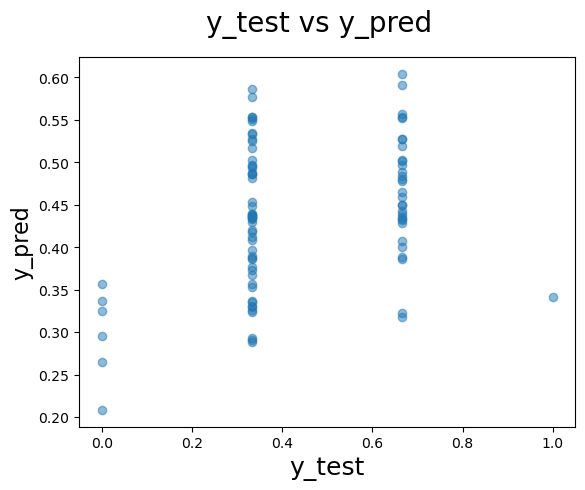

In [84]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [86]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.12016134298060688

In [90]:
# We already have the value of R^2 (calculated in above step)
r2=r2_score(y_test, y_pred)

In [91]:
# Get the shape of X_test
X_test.shape

(90, 26)

In [92]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

-0.2429466742019999

## Conclusiones
El modelo no es le indicado para aplicar a una encuesta de bienestar ya que por lo tipos de datos que se maneja no se puede modelar una ecuacion correctamente.